In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

# from orbit.utils.dataset import load_iclaims
# from orbit.models.dlt import DLT
# from orbit.diagnostics.plot import plot_predicted_data

from sup import *

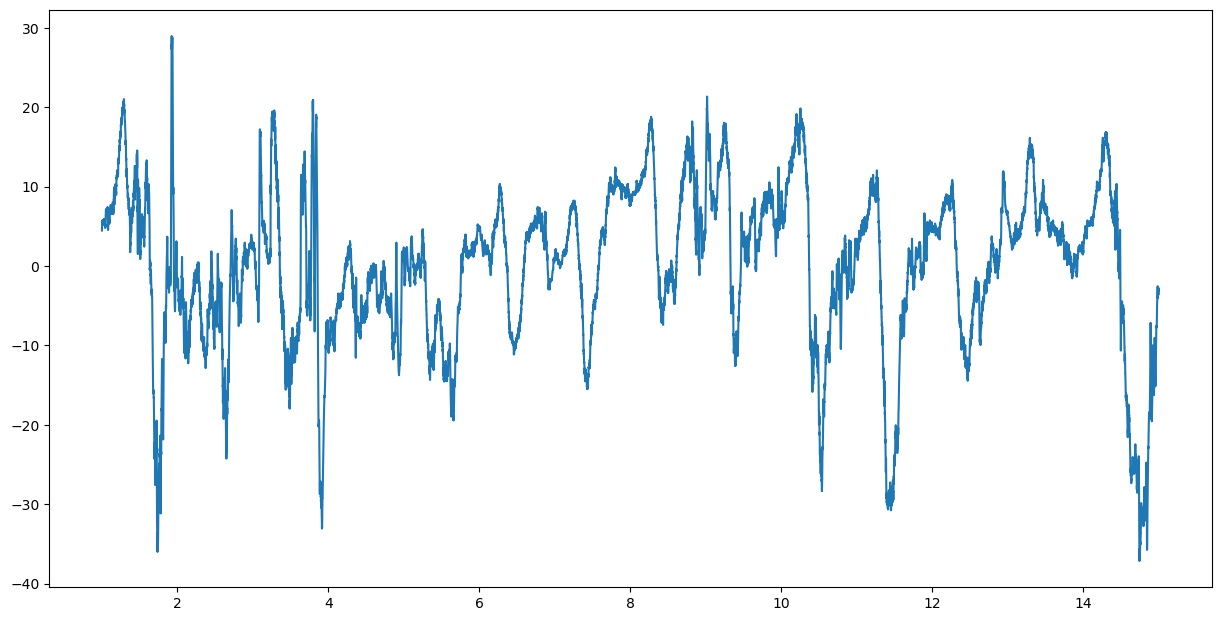

In [3]:
# data = pd.read_csv('data/1-14 Jan 2024, Surlari, B-x.txt', sep=" ", header=None)
file_path = 'materials/Для студентов (Геомагнитное поле)/Для студентов (Геомагнитное поле)/1-14 Jan 2024, Surlari, B-x.txt'

x = []
y = []

with open(file_path, 'r') as file:
    for line in file:
        if line.startswith('Time (Days)'):
            break
    for line in file:
        if line.strip(): 
            parts = line.split()  
            x.append(float(parts[0]))
            y.append(float(parts[-1]))

x = np.array(x)
y = np.array(y)

fig_size = 15

ym = y - y.mean()
fig = plt.figure(figsize=(fig_size, fig_size/2))
plt.plot(x,ym)

In [3]:
len(x)

20160

## Savitzky-Golay smoothing

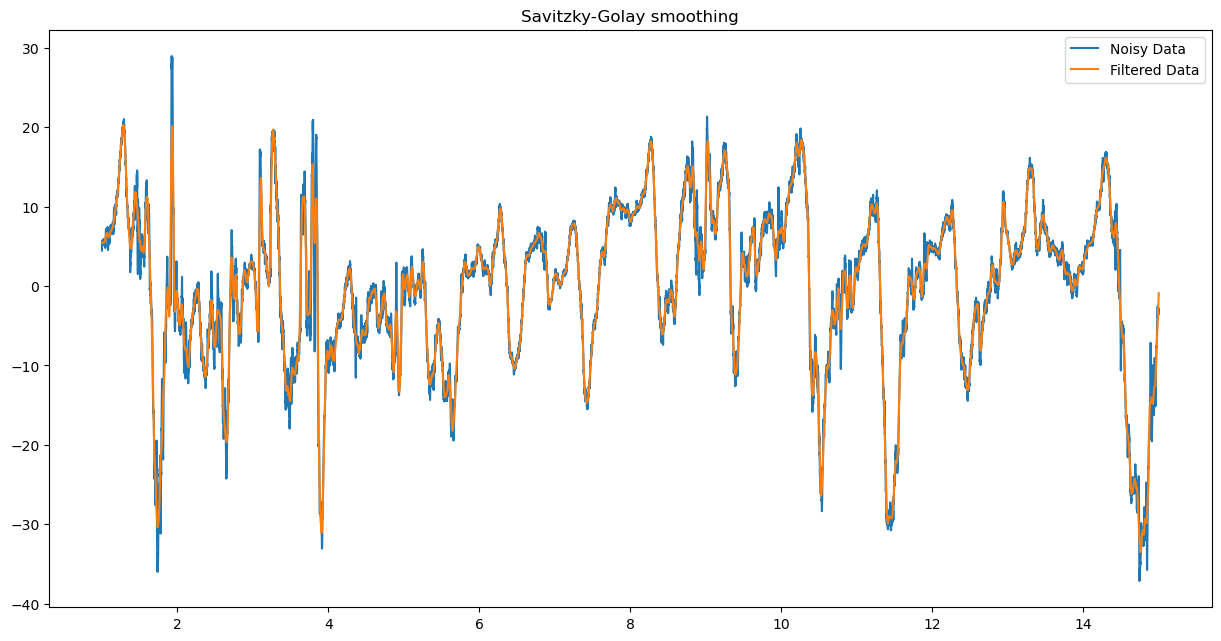

In [20]:
from scipy.signal import savgol_filter

window = 101

y_filtered_sg = savgol_filter(ym, window_length=window, polyorder=2)
fig = plt.figure(figsize=(fig_size, fig_size/2))
plt.plot(x, ym, label='Noisy Data')
plt.plot(x, y_filtered_sg, label='Filtered Data')
plt.title('Savitzky-Golay smoothing')
plt.legend()
plt.show()

## Exponential Smoothing

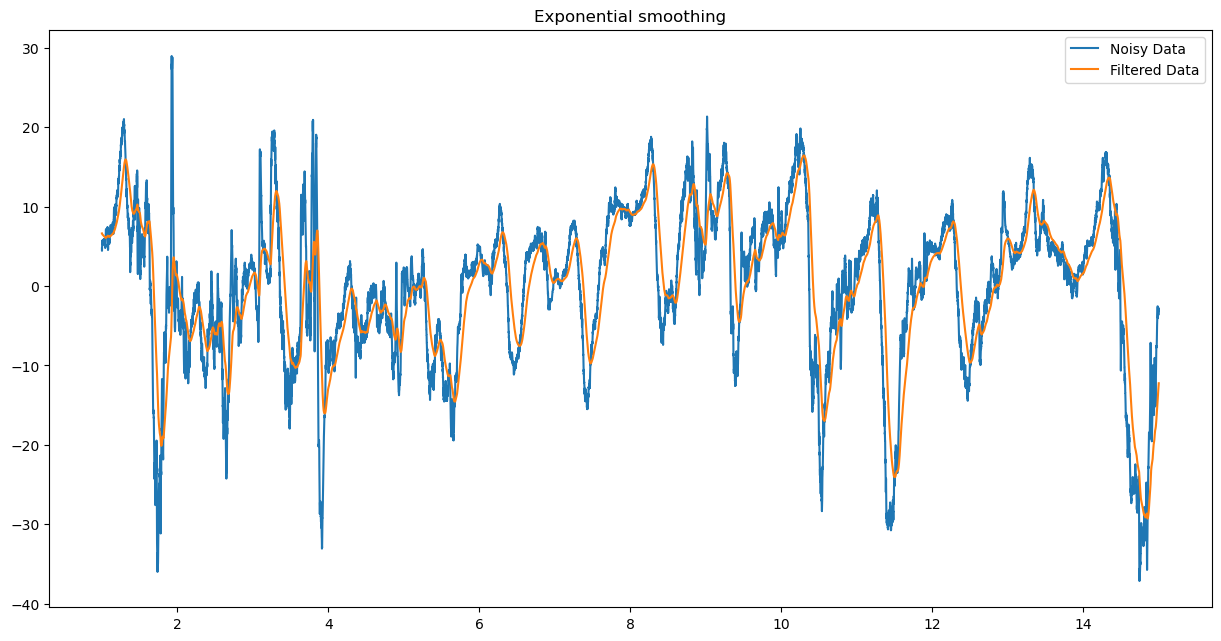

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

a = 0.01

model = ExponentialSmoothing(ym)

fit_model = model.fit(smoothing_level=a)

y_filtered_exp = fit_model.fittedvalues

fig = plt.figure(figsize=(fig_size, fig_size/2))
plt.plot(x, ym, label='Noisy Data')
plt.plot(x, y_filtered_exp, label='Filtered Data')
plt.title('Exponential smoothing')
plt.legend()
plt.show()


## Moving Average

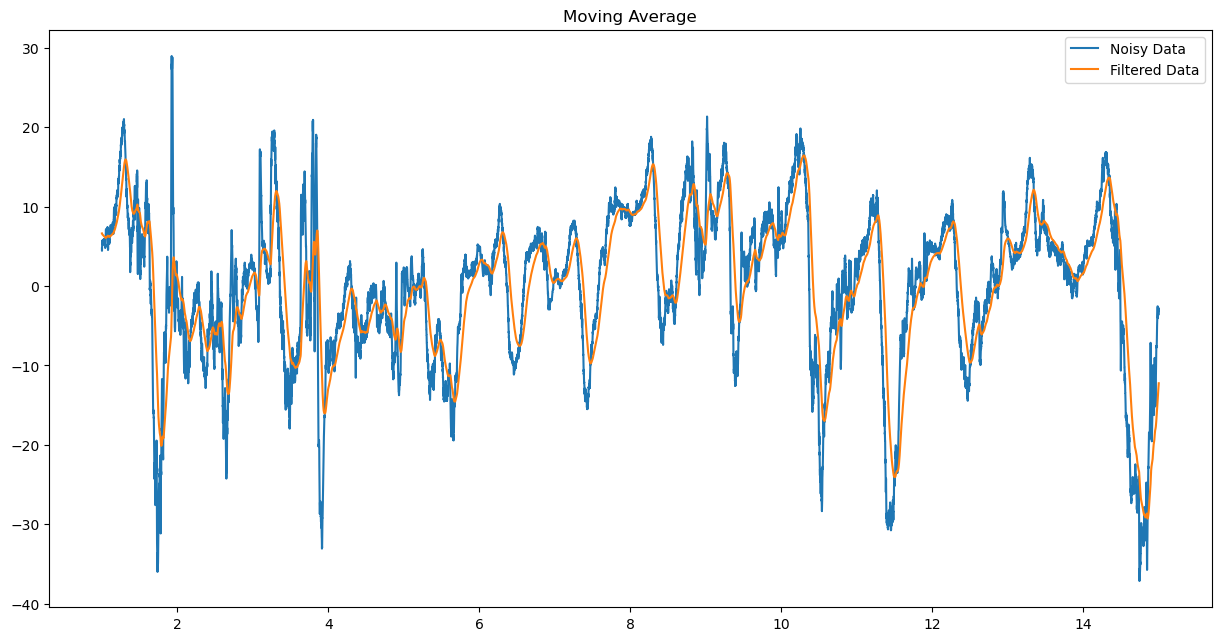

In [30]:
window_size = 5

y_filtered_ma = pd.Series(ym).rolling(window=window_size).mean()

fig = plt.figure(figsize=(fig_size, fig_size/2))
plt.plot(x, ym, label='Noisy Data')
plt.plot(x, y_filtered_exp, label='Filtered Data')
plt.title('Moving Average')
plt.legend()
plt.show()

In [25]:
data = pd.DataFrame({
    'x': x,
    'y': ym,
    'y_xg': y_filtered_sg,
    'y_exp': y_filtered_exp,
    'y_ma': y_filtered_ma,
})
data.to_csv('filtered.csv', index=False)

In [29]:
testdf = pd.read_csv('filtered.csv')
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20160 non-null  float64
 1   y       20160 non-null  float64
 2   y_xg    20160 non-null  float64
 3   y_exp   20160 non-null  float64
 4   y_ma    20156 non-null  float64
dtypes: float64(5)
memory usage: 787.6 KB
